# Quickstart


The easiest way to get started with using **Tweezepy** is to use it for a project. Here's an annotated fully-functional example that demonstrates standard usage.

## Load in data

Standard usage of **Tweezepy** takes in a 1D array of bead positions in nm, trace, collected at a known sampling frequency, fsample. There are many ways to load data into Python depending on its format. [Here](https://cmdlinetips.com/2018/01/how-to-read-a-numerical-data-file-in-python-with-numpy/) is a quick tutorial for how to load in data from csv files.

For this tutorial, we will use an example trajectory that is included with **Tweezepy**. The sampling frequency for this data was 400 Hz.

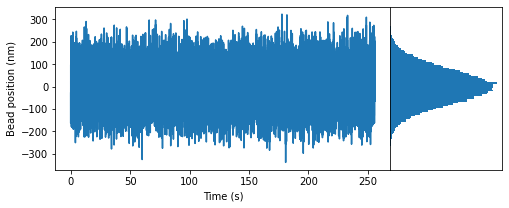

In [1]:
import numpy as np # Loads the numpy package
import matplotlib.pyplot as plt # Loads the matplotlib package for plotting
from tweezepy import load_trajectory # Loads in the exampled trajectory in tweezepy
fsample = 400 # sampling frequency in Hz
trace = load_trajectory() # load in trajectory in nm
N = len(trace) # number of points in trajectory
time = np.arange(N)/fsample # time in s
fig,ax = plt.subplots(figsize=(8,3), # Figure size
                      ncols=2, # number of columns in figure
                      gridspec_kw={'width_ratios':[3,1], # width ratio of columns
                                   'wspace':0}) # space between columns
ax[0].plot(time, trace) # Plot bead positions as a function of time
ax[1].hist(trace, bins=100, orientation = 'horizontal') # Plot histogram of bead positions
ax[0].set_xlabel('Time (s)') # Label x axis
ax[0].set_ylabel('Bead position (nm)') # Label yaxis
ax[1].set_xticks([]) # Remove xticks on histogram axis
ax[1].set_yticks([]); # Remove yticks on historgram axis

The plot above shows the bead positions at each time point in the example trajectory and a histogram of the bead positions.

## Using the power spectral density (PSD) method
To use the power spectral density (PSD) method, simply import and call the `PSD` class. To see all the expected inputs (parameters) and availed methods, you can use Python's built-in help() function. 

In [2]:
from tweezepy import PSD # Load in PSD class
help(PSD)

Help on class PSD in module tweezepy.smmcalibration:

class PSD(calibration, tweezepy.MLE.MLEfit)
 |  PSD(trace, fsample, bins=3)
 |  
 |  A class for computing and fitting the power spectral density using maximum likelihood estimation.
 |  
 |  Parameters
 |  ----------
 |  trace : array
 |      Bead positions in nm.
 |  fsample : float
 |      Sampling frequency in Hz
 |  bins : int, optional
 |      Number of bins, by default 3
 |  
 |  Example
 |  -------
 |  >>> from tweezepy import load_trajectory, PSD            
 |  >>> trace = load_trajectory() # Load trajectory in nm
 |  >>> psd = PSD(trace, fsample = 400) # Compute PSD using Welch's method
 |  >>> psd.mlefit() # Perform MLE fit
 |  >>> print(psd.results)
 |  
 |  Method resolution order:
 |      PSD
 |      calibration
 |      tweezepy.MLE.MLEfit
 |      tweezepy.MLE.MCMC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, trace, fsample, bins=3)
 |      Initialize self.  See help(type(self)) for a

### Estimating the PSD of a trajectory
To estimate the PSD of a trajectory, simply input the trajectory (in nm) and sampling frequency (in Hz) into the `PSD` class. The `PSD` class uses Welch's method to estimate the PSD. By default, it splits the data into three half-overlapping bins, calculates the PSD for each bin, and averages them together to reduce noise. The resulting PSD values are stored in a dictionary that can be directly accessed via the data attribute.

In [3]:
psd = PSD(trace,fsample)
for key, value in psd.data.items():
    print(key, ' : ', value)

x  :  [7.81250000e-03 1.56250000e-02 2.34375000e-02 ... 1.99976562e+02
 1.99984375e+02 1.99992188e+02]
shape  :  [3. 3. 3. ... 3. 3. 3.]
y  :  [2.36022201e+02 3.37331831e+02 2.30037921e+02 ... 2.84133014e-01
 5.72460759e-01 8.58512762e-01]
yerr  :  [1.36267481e+02 1.94758624e+02 1.32812456e+02 ... 1.64044272e-01
 3.30510373e-01 4.95662574e-01]


The PSD values can also be plotted via the built-in plotting method.

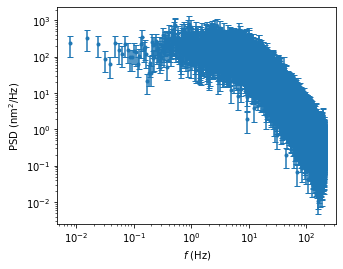

In [4]:
psd.plot();

The noise can be further reduced, at the cost of low frequency resolution, by changing the number of half-overlapping bins via the optional **bins** parameter in `PSD`. 

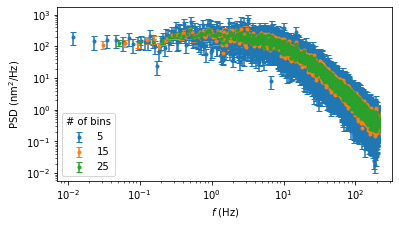

In [5]:
bins = [5,15,25] # number of half-overlapping bins
fig = plt.figure() # figure setup
for b in bins:
    psd = PSD(trace,fsample = fsample,bins=b) # estimate PSD values
    fig, ax = psd.plot(fig=fig,data_label=b) # plot PSD values
ax[0].legend(title = '# of bins') # Legend

This figure shows the estimated PSD of the simulated bead trajectory.

### Fitting a model to the estimated PSD using maximum likelihood estimation (MLE)

To fit a model to the estimated PSD and estimate parameters, simply call the PSD object and use the mlefit method. By default, it uses the analytical function from Lansdorp et al. (2012) which assumes zero dead-time and accounts for aliasing and motion blur.

For this example, we will use 5 half-overlapping bins.

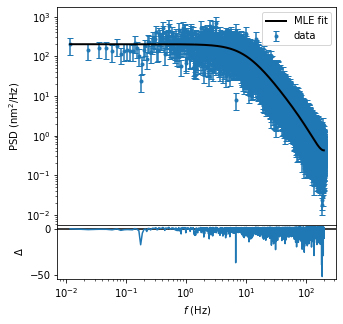

In [10]:
psd = PSD(trace,fsample,bins=5)
psd.mlefit()
fig,ax = psd.plot(data_label='data',fit_label = 'MLE fit')
ax[0].legend()

The figure above shows the MLE fit to the PSD estimates. 

The parameters and their associated uncertainties are stored in a dictionary that can be accessed directly through the results attribute.

In [7]:
from IPython.display import display, Math
txt = r"$\gamma = %.1e\pm%.1e\textrm{ pNs/nm}$"%(psd.results['g'],psd.results['g_error'])
display(Math(txt))
txt = r"$\kappa = %.1e\pm%.1e\textrm{ pN/nm}$"%(psd.results['k'],psd.results['k_error'])
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Using the Allan variance (AV) class
Using the Allan variance (AV) class is similar to the PSD class; simply import and call the `AV` class. Use the built-in help() function to print the AV method's docstring, which includes a description of all the inputs (parameters) and methods.

In [8]:
from tweezepy import AV
help(AV)

Help on class AV in module tweezepy.smmcalibration:

class AV(calibration)
 |  AV(trace, fsample, taus='octave', mode='oavar', edf='real')
 |  
 |  A class for computing and fitting the Allan variance using maximum likelihood estimation.
 |  
 |  Parameters
 |  ----------
 |  trace : array
 |      Bead trajectory in nm.
 |  fsample : float
 |      Sampling frequency in Hz.
 |  taus : str, optional
 |      Tau interval sampling. Options are 'octave', 'decade', and 'all', by default 'octave'
 |  mode : str, optional
 |      Allan variance type, either 'avar', 'oavar', and 'totvar', by default 'oavar'. 
 |      See allanvar module for more information.
 |  edf : str, optional
 |      Equivalent degrees of freedom for AV. Options are 'real' and 'approx', by default 'real'
 |  
 |  Raises
 |  ------
 |  AssertionError
 |      If taus, mode, or edf is not recognized.
 |  
 |  Examples
 |  --------
 |  >>> from tweezepy import load_trajectory, AV
 |  >>> trace = load_trajectory() # Load traje

### Estimating the AV of a trajectory
As with the PSD class, input the trajectory (in nm) and sampling frequency (in Hz) into the `AV` class. By default, the `AV` class uses the overlapping AV, octave spaced samples, and calculates the type of noise and equivalent degrees of freedom. Because the AV method uses logarithmically spaced bins, there is no optional bins parameter, which somewhat simplifies its use for calibration.

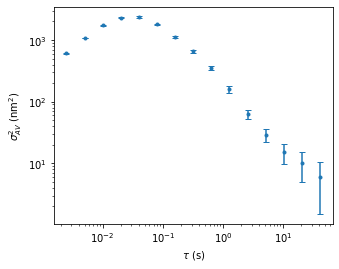

In [9]:
av = AV(trace,fsample)
fig, ax = av.plot()

### Fitting a model to the estimated AV using maximum likelihood estimation (MLE)
As with the `PSD` class, to fit a model to the estimated AV, simply call the `AV` object and use the mlefit method. By default, it uses the analytical function from Lansdorp et. al (2012). 

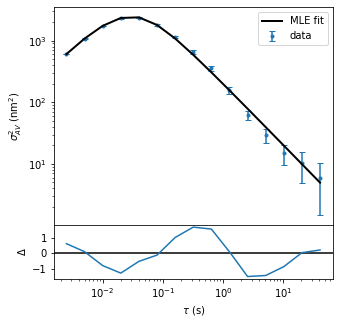

In [31]:
av.mlefit()
fig,ax = av.plot(data_label='data',fit_label = 'MLE fit')
ax[0].legend()

The above figure shows the MLE fit to the AV estimates.

Once again, the parameters and their associated uncertainties can be accessed directly.

In [11]:
txt = r"$\gamma = %.1e\pm%.1e\textrm{ pNs/nm}$"%(av.results['g'],av.results['g_error'])
display(Math(txt))
txt = r"$\kappa = %.1e\pm%.1e\textrm{ pN/nm}$"%(av.results['k'],av.results['k_error'])
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>